<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/02_Pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing relevant Liabraries

In [3]:
# Importing relevent Liabraries
import torch
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

## 2.Getting Data and converting them into tensors 

In [4]:
from sklearn.datasets import make_circles
n_samples = 1000
circles = make_circles(n_samples,noise = 0.03)

In [5]:
X,y = circles[0],circles[1]

In [6]:
## Making a dataset containing out X and y variables
circles_df = pd.DataFrame({'X1':X[:,0],
                           'X2':X[:,1],
                           'label':y})

In [7]:
circles_df.head(5)

,X1,X2,label
0,0.386808,-0.687153,1
1,-0.044048,-0.796917,1
2,-0.309095,-0.756180,1
3,-0.145827,0.809942,1
4,0.295520,0.715243,1


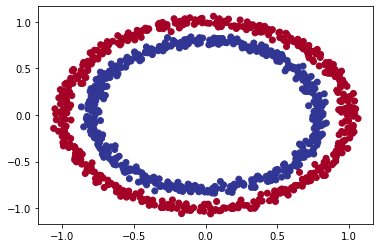

In [8]:
## plotting to see what our data actually looks like
plt.scatter(X[:,0],X[:,1],c = y,cmap =plt.cm.RdYlBu)
plt.show()

In [9]:
## converting X and y into tensors  
X = torch.tensor(X).type(torch.float)
y = torch.tensor(y).type(torch.float)
## spliting our data into training and testing data with test size as 20% of the data 
X_train,X_test,y_train,y_test= train_test_split(X,
                                                y,
                                                random_state = 42,
                                                test_size =0.2)

In [10]:
import torch 
from torch import nn
## setting up a device agnostic code
device ='cuda'  if torch.cuda.is_available() else 'cpu'

## 3.Coding out a neural network for Binary Classification

### 3.1 Constructing a Class that subclasses `nn.Module`. 

In [11]:
class BinaryClassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
  def forward(self,x : torch.Tensor)-> torch.Tensor:
    return self.layer_2(self.layer_1(x))

#Instance of out models_class
model_0 = BinaryClassification().to(device)

In [12]:
#print(f'Our model is on: {next(model_0.parameters()).device}')

In [13]:
## writing the same code using `nn.sequential`
model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1)
).to(device)


In [14]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[ 0.0299,  0.4086],
                      [ 0.2170, -0.0415],
                      [-0.6611,  0.6201],
                      [-0.3582, -0.5377],
                      [ 0.6146,  0.3810]])),
             ('0.bias', tensor([-0.5807,  0.1867, -0.3446, -0.3675, -0.5897])),
             ('1.weight',
              tensor([[-0.2977,  0.2328, -0.4460,  0.0346,  0.2077]])),
             ('1.bias', tensor([-0.3860]))])

In [15]:
## sitching the deive of our data gpu/cuda:0
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

### 3.2 Setting up a loss function and an optimizer

In [16]:
## loss function
loss_fn = nn.BCEWithLogitsLoss()

## optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.01)

In [17]:
def accuracy_score(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = correct/len(y_pred)
  return acc*100

### 3.3 Creating a training Loop

In [18]:
torch.cuda.manual_seed(42)

epochs = 100

for epoch in range(epochs):

  model_0.train()

  y_logits = model_0(X_train).squeeze()
  activation = nn.Sigmoid()
  y_pred = torch.round(activation(y_logits))

  loss = loss_fn(y_logits,y_train)
  
  train_acc = accuracy_score(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()
  model_0.eval()  
  with torch.inference_mode():
    predictions = model_0(X_test)
  predictions = torch.round(predictions)
  predictions= predictions.squeeze()
  test_acc =accuracy_score(y_test,predictions)
  if epoch%10 ==0:
    print(f"epoch:{epoch} \n training_loss: {loss} | accuracy on training data_data: {train_acc} \n accuracy on test data_data: {test_acc}")

epoch:0 
 training_loss: 0.7116574048995972 | accuracy on training data_data: 50.24999999999999 
 accuracy on test data_data: 37.5
epoch:10 
 training_loss: 0.7109724283218384 | accuracy on training data_data: 50.375 
 accuracy on test data_data: 37.5
epoch:20 
 training_loss: 0.7103312015533447 | accuracy on training data_data: 50.5 
 accuracy on test data_data: 38.0
epoch:30 
 training_loss: 0.709729790687561 | accuracy on training data_data: 50.125 
 accuracy on test data_data: 39.5
epoch:40 
 training_loss: 0.7091646790504456 | accuracy on training data_data: 50.24999999999999 
 accuracy on test data_data: 39.5
epoch:50 
 training_loss: 0.7086327075958252 | accuracy on training data_data: 50.5 
 accuracy on test data_data: 40.0
epoch:60 
 training_loss: 0.7081310749053955 | accuracy on training data_data: 50.625 
 accuracy on test data_data: 40.5
epoch:70 
 training_loss: 0.7076572179794312 | accuracy on training data_data: 50.5 
 accuracy on test data_data: 41.0
epoch:80 
 trainin

In [19]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 6.1 MB/s 


In [20]:
y_test = y_test.type(torch.int)
import torchmetrics
acc = torchmetrics.functional.accuracy(predictions, y_test)
acc

tensor(0.5350)

In [21]:
import requests
from pathlib import Path

if Path("helper_file.py").is_file():
  print('helper_funtions_already_exists')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_file.py','wb') as f:
    f.write(request.content)

In [22]:
from helper_file import plot_decision_boundary, plot_predictions

## 4.Plot predictions


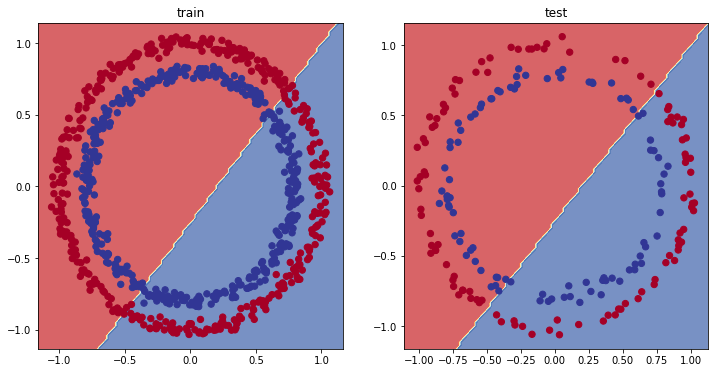

In [23]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,X_test,y_test)


## 5.Improving the model through changing hyperparameters

In [24]:
class circlemodelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layers = nn.Sequential(nn.Linear(2,5),
                                nn.Linear(5,1))
    
  def forward(self,x:torch.Tensor):
    return self.Layers(x)
model_1 = circlemodelV0().to(device)

In [25]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr = 0.001)

torch.cuda.manual_seed(42)
torch.manual_seed(42)
epochs =1000
for epoch in range(epochs):
  model_1.train()
  y_preds = model_1(X_train).squeeze()
  y_logits = torch.round(torch.sigmoid(y_preds))
  loss = loss_fn(y_preds,y_train)
  train_acc = torchmetrics.functional.accuracy(y_logits,y_train.type(torch.int),)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    predictions = model_1(X_test)
    test_preds = torch.round(torch.sigmoid(predictions.squeeze())) 
    test_acc = torchmetrics.functional.accuracy(test_preds,y_test)
    if epoch %100 ==0:
      print(f"epoch: {epoch} \n train_accuracy = {train_acc} \n test_accuracy = {test_acc}")

epoch: 0 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 100 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 200 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 300 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 400 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 500 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 600 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 700 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 800 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437
epoch: 900 
 train_accuracy = 0.49125000834465027 
 test_accuracy = 0.5350000262260437


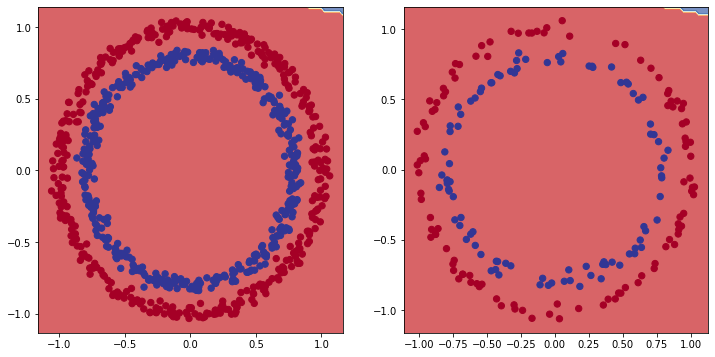

In [26]:
from helper_file import plot_decision_boundary, plot_predictions
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_1,X_test,y_test)

## 6.Creating a model with non Linearity 

In [27]:
layers = nn.Sequential(
        nn.Linear(2,10),        
        nn.Linear(10,10),
        nn.Linear(10,1),
        nn.ReLU()
    )

In [28]:
class circlemodelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2,10)
    self.layer_2 = nn.Linear(10,10)
    self.layer_3 = nn.Linear(10,1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

torch.cuda.manual_seed(42)
torch.manual_seed(42)

model_2 = circlemodelV1().to(device)


In [29]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),lr = 0.2)

epochs = 1000

X_train,X_test,y_train,y_test  = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits).to(device))
  train_acc = torchmetrics.functional.accuracy(y_pred,y_train.type(torch.int))
  loss = loss_fn(y_logits,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_2.eval()
  with torch.inference_mode():
    predictions = model_2(X_test).squeeze()
    preds_rounded = torch.round(torch.sigmoid(predictions.to(device)))
    test_acc = torchmetrics.functional.accuracy(preds_rounded,y_test.type(torch.int))
    if epoch%100 ==0:
      print(f"epoch: {epoch} \n train accuracy; {train_acc:.5f} \n test accuracy; {test_acc:.5f}")


epoch: 0 
 train accuracy; 0.50875 
 test accuracy; 0.46500
epoch: 100 
 train accuracy; 0.69250 
 test accuracy; 0.64000
epoch: 200 
 train accuracy; 0.63125 
 test accuracy; 0.64500
epoch: 300 
 train accuracy; 0.62875 
 test accuracy; 0.62500
epoch: 400 
 train accuracy; 0.68125 
 test accuracy; 0.67500
epoch: 500 
 train accuracy; 0.89125 
 test accuracy; 0.86000
epoch: 600 
 train accuracy; 0.97250 
 test accuracy; 0.97000
epoch: 700 
 train accuracy; 0.67875 
 test accuracy; 0.70000
epoch: 800 
 train accuracy; 0.99875 
 test accuracy; 1.00000
epoch: 900 
 train accuracy; 0.99875 
 test accuracy; 1.00000


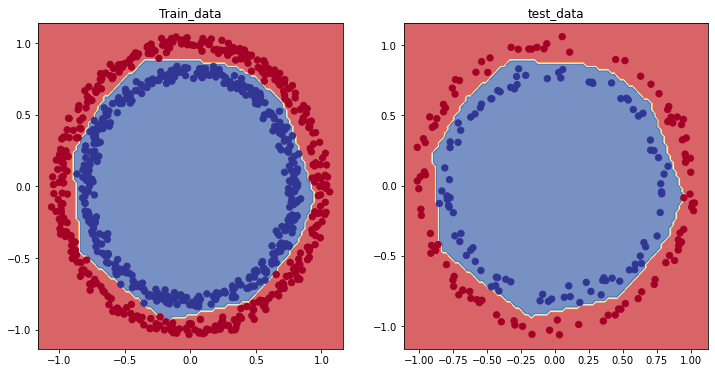

In [30]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title('Train_data')
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test_data')
plot_decision_boundary(model_2,X_test,y_test)

In [32]:
a = torch.arange(-10,10,1.0)
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1/(1+ torch.exp(-x))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])




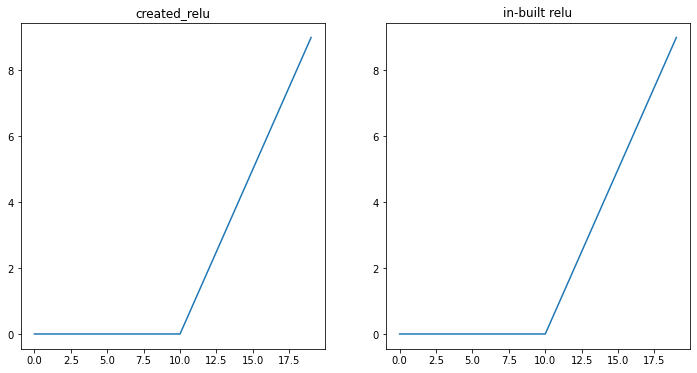

In [38]:
print(relu(a)) 
print('\n')
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('created_relu')
plt.plot(relu(a))
plt.subplot(1,2,2)
plt.title('in-built relu')
plt.plot(torch.relu(a))

In [36]:
torch.relu(a)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])




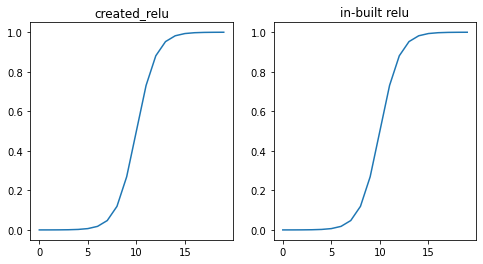

In [52]:
print(sigmoid(a)) 
print('\n')
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.title('created_relu')
plt.plot(sigmoid(a))
plt.subplot(1,2,2)
plt.title('in-built relu')
plt.plot(torch.sigmoid(a))